# Evolving convection of a Darcy fluid in a cross-bedded porous rectangle

$$
\begin{cases}
\mathbb{S}=
\mathcal{L} = D_{\text{ref}}/\mathcal{U} & \text{scaling with diffusive length and convective speed} \\
\mathcal{U} = K_{\text{ref}}\,g\Delta\rho/\mu_{\text{ref}} \\
\mathcal{T} = \phi_{\text{ref}}\mathcal{L}/\mathcal{U} \\
\Omega = [0, Ra\mathcal{A}] \times [0, Ra] & \text{aspect ratio } \mathcal{A}=\mathcal{O}(1)\\
\textbf{e}_g=-\textbf{e}_y & \text{gravity acting downwards}\\ 
\phi = 1 & \text{constitutive relations} \\
\mathsf{D} = \mathsf{I} \\ 
\mathsf{K} = \begin{pmatrix}
\cos^2\vartheta +\kappa\sin^2\vartheta & (1 -  \kappa)\cos\vartheta\sin\vartheta \\
(1 -  \kappa)\cos\vartheta\sin\vartheta & \cos^2\vartheta +\kappa\sin^2\vartheta\\
 \end{pmatrix}\\ 
\mu = 1 \\
\rho(c) = c \\
c_0(x,y)=\lim_{\epsilon\to0}\frac{1}{2}\left(1+\text{erf}\left(\frac{y-Ra}{\epsilon Ra}\right)\right)+\mathcal{N}(x,y) & \text{diffusive base state plus noise} \\
c_{\text{D}}(x,y=Ra)=1 & \text{prescribed concentration on upper and lower boundaries} \\
c_{\text{N}}(x,y=0)=0 & \text{no-flux on lower, left and right boundaries}\\
c_{\text{N}}(x=0,y)=0 \\
c_{\text{N}}(x=Ra\mathcal{A},y)=0 \\
\psi_{\text{D}}\vert_{\partial\Omega}=0 & \text{no-penetration on entire boundary}
\end{cases}
$$

In [ ]:
from lucifex.fdm import AB2, CN
from lucifex.sim import run
from lucifex.viz import plot_colormap
from lucifex.io import write, get_ipynb_file_name

from py.darcy_convection_evolving import darcy_convection_evolving_rectangle


simulation = darcy_convection_evolving_rectangle(
    aspect=2.0,
    Nx=64,
    Ny=64,
    cell='quadrilateral', 
    Ra=500.0, 
    kappa=0.1,
    vartheta=45.0,
    c_eps=1e-4, 
    c_freq=(14, 14), 
    c_seed=(456, 987), 
    D_adv=AB2,
    D_diff=CN,
)

n_stop = 200
dt_init = 1e-6
n_init = 5
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

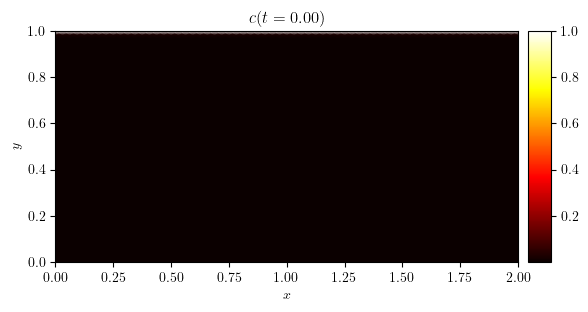

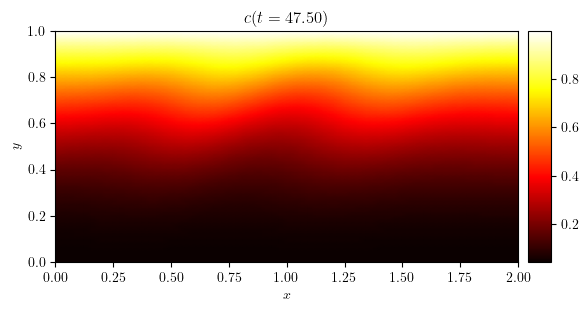

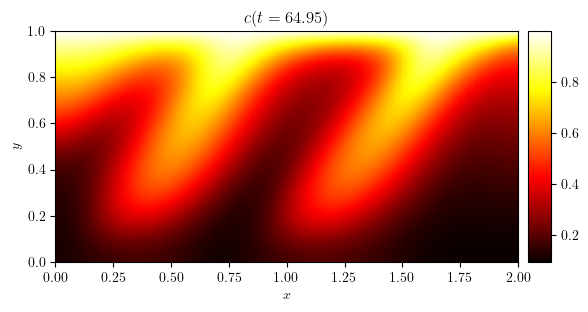

In [ ]:
c = simulation['c']

i_mid = int(0.5 * len(c.series))
time_indices = (0, i_mid,  -1)
for i in time_indices:
    fig, ax = plot_colormap(c.series[i], title=f'$c(t={c.time_series[i]:.2f})$')
    write(fig, f'{get_ipynb_file_name()}_c(t={c.time_series[i]:.2f})', './figures', close=False, pickle=False)